### Data
ene.026 GCAM Projections <br>
https://resourcewatch.carto.com/u/wri-rw/dataset/dash_0061_gcam_wind_solar_share_projections (pre-processed data)<br>

In [1]:
import numpy as np
import vega
import json
from vega import Vega

### Resource Watch specification
API ID: 33a9f375-22e3-42bd-9604-771e18ac10e9 <br>
https://resourcewatch.org/embed/widget/33a9f375-22e3-42bd-9604-771e18ac10e9

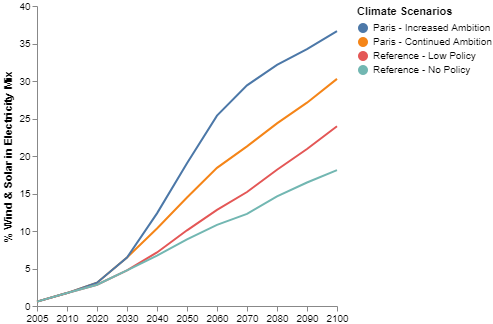

In [2]:
specV3=json.loads("""
{
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {
          "events": "@cell:mouseover",
          "update": "datum"
        },
        {
          "events": "@cell:mouseout",
          "update": "null"
        }
      ]
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://api.resourcewatch.org/v1/query/ca59432c-b602-4d4a-809e-2a57758bddf3?sql=SELECT year as x, value*100 AS y, scenario as c FROM dash_0061_gcam_wind_solar_share_projections  ORDER BY scenario ASC, year ASC",
      "format": {
        "property": "data",
        "type": "json"
      },
      "transform": [
        {
          "type": "formula",
          "as": "c",
          "expr": "replace(datum.c,/_/g,' ')"
        }
      ]
    },
    {
      "name": "dots",
      "source": "table",
      "transform": [
        {
          "type": "filter",
          "expr": "hover && hover.datum.x === datum.x && hover.datum.y === datum.y"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "point",
      "range": "width",
      "domain": {
        "data": "table",
        "field": "x"
      }
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "nice": true,
      "zero": true,
      "domain": {
        "data": "table",
        "field": "y"
      }
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": "category",
      "domain": [
        "Paris - Increased Ambition",
        "Paris - Continued Ambition",
        "Reference - Low Policy",
        "Reference - No Policy"
      ]
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "labelOverlap": "parity",
      "scale": "x"
    },
    {
      "title": "% Wind & Solar in Electricity Mix",
      "orient": "left",
      "labelOverlap": "parity",
      "scale": "y"
    }
  ],
  "marks": [
    {
      "name": "lines",
      "type": "group",
      "from": {
        "facet": {
          "name": "series",
          "data": "table",
          "groupby": "c"
        }
      },
      "marks": [
        {
          "type": "line",
          "interactive": false,
          "from": {
            "data": "series"
          },
          "encode": {
            "enter": {
              "x": {
                "scale": "x",
                "field": "x"
              },
              "y": {
                "scale": "y",
                "field": "y"
              },
              "stroke": {
                "scale": "color",
                "field": "c"
              },
              "strokeWidth": {
                "value": 2
              }
            }
          }
        }
      ]
    },
    {
      "name": "pointss",
      "interactive": false,
      "type": "symbol",
      "from": {
        "data": "table"
      },
      "encode": {
        "enter": {
          "x": {
            "scale": "x",
            "field": "x"
          },
          "y": {
            "scale": "y",
            "field": "y"
          },
          "opacity": {
            "value": 0
          }
        }
      }
    },
    {
      "name": "points",
      "interactive": false,
      "type": "symbol",
      "from": {
        "data": "dots"
      },
      "encode": {
        "enter": {
          "x": {
            "scale": "x",
            "field": "x"
          },
          "y": {
            "scale": "y",
            "field": "y"
          }
        },
        "update": {
          "fill": {
            "scale": "color",
            "field": "c"
          },
          "opacity": {
            "value": 1
          }
        }
      }
    },
    {
      "name": "cell",
      "type": "path",
      "from": {
        "data": "pointss"
      },
      "transform": [
        {
          "type": "voronoi",
          "x": "datum.x",
          "y": "datum.y",
          "size": [
            {
              "signal": "width"
            },
            {
              "signal": "height"
            }
          ]
        }
      ],
      "encode": {
        "update": {
          "fill": {
            "value": "red"
          },
          "path": {
            "field": "path"
          },
          "opacity": {
            "value": 0
          }
        }
      }
    }
  ],
  "legends": [
    {
      "title": "Climate Scenarios",
      "fill": "color",
      "orient": "right"
    }
  ],
  "interaction_config": [
    {
      "name": "tooltip",
      "config": {
        "fields": [
          {
            "column": "datum.y",
            "property": "percentage",
            "type": "number",
            "format": ".2s"
          },
          {
            "column": "datum.c",
            "property": "Scenario",
            "type": "string"
          },
          {
            "column": "datum.x",
            "property": "Year",
            "type": "string"
          }
        ]
      }
    }
  ]
}
""")
vega4view=dict(specV3)
vega4view['width']=300
vega4view['height']=300
Vega(vega4view)

### Stand-alone specification
(eg for use with https://vega.github.io/editor/#/)

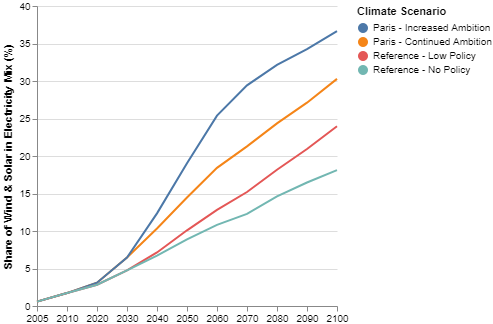

In [5]:
specV3=json.loads("""
{
  "width": 300,
  "height": 300,
  "autosize": {
    "type": "pad",
    "resize": true,
    "contains": "padding"
  },
  "signals": [
    {
      "name": "hover",
      "value": null,
      "on": [
        {
          "events": "@cell:mouseover",
          "update": "datum"
        },
        {
          "events": "@cell:mouseout",
          "update": "null"
        }
      ]
    }
  ],
  "data": [
    {
      "name": "table",
      "url": "https://wri-rw.carto.com/api/v2/sql?q=SELECT year as x, value*100 AS y, scenario as c FROM dash_0061_gcam_wind_solar_share_projections  ORDER BY c ASC, x ASC",
      "format": {
        "type": "json",
        "property": "rows"
      },
      "transform": [
        {
          "type": "formula",
          "as": "c",
          "expr": "replace(datum.c,/_/g,' ')"
        }
      ]
    },
    {
      "name": "dots",
      "source": "table",
      "transform": [
        {
          "type": "filter",
          "expr": "hover && hover.datum.x === datum.x && hover.datum.y === datum.y"
        }
      ]
    }
  ],
  "scales": [
    {
      "name": "x",
      "type": "point",
      "range": "width",
      "domain": {
        "data": "table",
        "field": "x"
      }
    },
    {
      "name": "y",
      "type": "linear",
      "range": "height",
      "nice": true,
      "zero": true,
      "domain": {
        "data": "table",
        "field": "y"
      }
    },
    {
      "name": "color",
      "type": "ordinal",
      "range": "category",
      "domain": [
        "Paris - Increased Ambition",
        "Paris - Continued Ambition",
        "Reference - Low Policy",
        "Reference - No Policy"
      ]
    }
  ],
  "axes": [
    {
      "orient": "bottom",
      "labelOverlap": "parity",
      "scale": "x",
      "zindex": 1
    },
    {
      "title": "Share of Wind & Solar in Electricity Mix (%)",
      "orient": "left",
      "labelOverlap": "parity",
      "scale": "y",
      "grid": true,
      "zindex": 0
    }
  ],
  "marks": [
    {
      "name": "lines",
      "type": "group",
      "from": {
        "facet": {
          "name": "series",
          "data": "table",
          "groupby": "c"
        }
      },
      "marks": [
        {
          "type": "line",
          "interactive": false,
          "from": {
            "data": "series"
          },
          "encode": {
            "enter": {
              "x": {
                "scale": "x",
                "field": "x"
              },
              "y": {
                "scale": "y",
                "field": "y"
              },
              "stroke": {
                "scale": "color",
                "field": "c"
              },
              "strokeWidth": {
                "value": 2
              }
            }
          }
        }
      ]
    },
    {
      "name": "pointss",
      "interactive": false,
      "type": "symbol",
      "from": {
        "data": "table"
      },
      "encode": {
        "enter": {
          "x": {
            "scale": "x",
            "field": "x"
          },
          "y": {
            "scale": "y",
            "field": "y"
          },
          "opacity": {
            "value": 0
          }
        }
      }
    },
    {
      "name": "points",
      "interactive": false,
      "type": "symbol",
      "from": {
        "data": "dots"
      },
      "encode": {
        "enter": {
          "x": {
            "scale": "x",
            "field": "x"
          },
          "y": {
            "scale": "y",
            "field": "y"
          }
        },
        "update": {
          "fill": {
            "scale": "color",
            "field": "c"
          },
          "opacity": {
            "value": 1
          }
        }
      }
    },
    {
      "name": "cell",
      "type": "path",
      "from": {
        "data": "pointss"
      },
      "transform": [
        {
          "type": "voronoi",
          "x": "datum.x",
          "y": "datum.y",
          "size": [
            {
              "signal": "width"
            },
            {
              "signal": "height"
            }
          ]
        }
      ],
      "encode": {
        "update": {
          "fill": {
            "value": "red"
          },
          "path": {
            "field": "path"
          },
          "opacity": {
            "value": 0
          }
        },
        "hover": {
          "tooltip": {
            "signal": "{'Share':round(hover.datum.y)+'%','Scenario':hover.datum.c,'Year':hover.datum.x}"
          }
        }
      }
    }
  ],
  "legends": [
    {
      "title": "Climate Scenario",
      "fill": "color",
      "orient": "right"
    }
  ]
}
""")
vega4view=dict(specV3)
Vega(vega4view)